# Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels import api as sm
from sklearn.feature_selection import RFE
import scipy.stats as stats
from statsmodels.stats import weightstats
import statsmodels.stats.oneway as oneway
from scipy.stats import f_oneway
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

# Load data

In [2]:
df1 = pd.read_csv('Producer Prices.csv')
df2 = pd.read_csv('Consumer Price Indices.csv')
df3 = pd.read_csv('Temperature_Change.csv')
df4 = pd.read_csv('Value_Added_Agri_Frs_Fishing.csv')
ire_df1 = df1.loc[df1['Area'] == 'Ireland']  # based on df1 ('Producer Prices.csv')

# Data Understanding
#####  - Collecting and preparing data for analysis
#####  - Exploring and visualizing data
#####  - Verifying data quality


In [3]:
df1.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Months Code,Months,Unit,Value,Flag,Flag Description
0,PP,Producer Prices,40,Austria,5532,Producer Price (USD/tonne),1341.0,Apples,1991,1991,7021,Annual value,USD,823.9,A,Official figure
1,PP,Producer Prices,40,Austria,5532,Producer Price (USD/tonne),1341.0,Apples,1992,1992,7021,Annual value,USD,765.3,A,Official figure
2,PP,Producer Prices,40,Austria,5532,Producer Price (USD/tonne),1341.0,Apples,1993,1993,7021,Annual value,USD,564.0,A,Official figure
3,PP,Producer Prices,40,Austria,5532,Producer Price (USD/tonne),1341.0,Apples,1994,1994,7021,Annual value,USD,478.0,A,Official figure
4,PP,Producer Prices,40,Austria,5532,Producer Price (USD/tonne),1341.0,Apples,1995,1995,7021,Annual value,USD,486.0,A,Official figure


In [4]:
df1.tail()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Months Code,Months,Unit,Value,Flag,Flag Description
36835,PP,Producer Prices,752,Sweden,5532,Producer Price (USD/tonne),111.0,Wheat,2016,2016,7021,Annual value,USD,150.1,A,Official figure
36836,PP,Producer Prices,752,Sweden,5532,Producer Price (USD/tonne),111.0,Wheat,2017,2017,7021,Annual value,USD,151.1,A,Official figure
36837,PP,Producer Prices,752,Sweden,5532,Producer Price (USD/tonne),111.0,Wheat,2018,2018,7021,Annual value,USD,213.3,A,Official figure
36838,PP,Producer Prices,752,Sweden,5532,Producer Price (USD/tonne),111.0,Wheat,2019,2019,7021,Annual value,USD,157.4,A,Official figure
36839,PP,Producer Prices,752,Sweden,5532,Producer Price (USD/tonne),111.0,Wheat,2020,2020,7021,Annual value,USD,169.6,A,Official figure


In [5]:
df1.shape

(36840, 16)

In [6]:
df1.isna().sum()

Domain Code         0
Domain              0
Area Code (M49)     0
Area                0
Element Code        0
Element             0
Item Code (CPC)     0
Item                0
Year Code           0
Year                0
Months Code         0
Months              0
Unit                0
Value               0
Flag                0
Flag Description    0
dtype: int64

In [7]:
df1.duplicated().sum()

0

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36840 entries, 0 to 36839
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       36840 non-null  object 
 1   Domain            36840 non-null  object 
 2   Area Code (M49)   36840 non-null  int64  
 3   Area              36840 non-null  object 
 4   Element Code      36840 non-null  int64  
 5   Element           36840 non-null  object 
 6   Item Code (CPC)   36840 non-null  float64
 7   Item              36840 non-null  object 
 8   Year Code         36840 non-null  int64  
 9   Year              36840 non-null  int64  
 10  Months Code       36840 non-null  int64  
 11  Months            36840 non-null  object 
 12  Unit              36840 non-null  object 
 13  Value             36840 non-null  float64
 14  Flag              36840 non-null  object 
 15  Flag Description  36840 non-null  object 
dtypes: float64(2), int64(5), object(9)
memor

### Finding The 'Maximum' Values for Europe

In [9]:
# We use the "idxmax" function to find the maximum value in the Series for European Countries
df1['Value'].idxmax()

6325

In [10]:
"""
The 'Iloc' helps us find the maximum value in df1. In 2013, Cyprus's Maximum Producer Price was 29243.2 USD/tone, 
which was paid for "Game meat, fresh, chilled or frozen." 
"""
df1.iloc[6325-1]

Domain Code                                          PP
Domain                                  Producer Prices
Area Code (M49)                                     196
Area                                             Cyprus
Element Code                                       5532
Element                      Producer Price (USD/tonne)
Item Code (CPC)                                21170.02
Item                Game meat, fresh, chilled or frozen
Year Code                                          2013
Year                                               2013
Months Code                                        7021
Months                                     Annual value
Unit                                                USD
Value                                           29243.2
Flag                                                  A
Flag Description                        Official figure
Name: 6324, dtype: object

### Finding The Miminum Values for Europe

In [11]:
df1['Value'].idxmin()

29173

In [12]:
df1.iloc[29173-1]

Domain Code                                   PP
Domain                           Producer Prices
Area Code (M49)                              642
Area                                     Romania
Element Code                                5532
Element               Producer Price (USD/tonne)
Item Code (CPC)                           1229.0
Item                Cantaloupes and other melons
Year Code                                   1996
Year                                        1996
Months Code                                 7021
Months                              Annual value
Unit                                         USD
Value                                      143.1
Flag                                           A
Flag Description                 Official figure
Name: 29172, dtype: object

In [13]:
# As indicated in the 'Value' column, the minimum value in Europe shows information about "cantaloupes and other melons" 
# in Romania in 1996 and the producer price was 143.1 USD/tonne.

## Maximum Values for Republic of Ireland

In [14]:
# Additionally, we would like to find out what the minimum and maximum values are in Ireland
ire_df1['Value'].idxmax() 

19534

In [15]:
df1.iloc[19534-1]

Domain Code                                 PP
Domain                         Producer Prices
Area Code (M49)                            372
Area                                   Ireland
Element Code                              5532
Element             Producer Price (USD/tonne)
Item Code (CPC)                         1270.0
Item                    Mushrooms and truffles
Year Code                                 2007
Year                                      2007
Months Code                               7021
Months                            Annual value
Unit                                       USD
Value                                   3642.2
Flag                                         A
Flag Description               Official figure
Name: 19533, dtype: object

In [16]:
# The Mximum value in Ireland shows information about "Mushrooms and truffles" in 2007 and the 
# producer price was 3642.2USD/tonne.

## Minimum Values for Republic of Ireland

In [17]:
ire_df1['Value'].idxmin()

19627

In [18]:
df1.iloc[19627-1]

Domain Code                                 PP
Domain                         Producer Prices
Area Code (M49)                            372
Area                                   Ireland
Element Code                              5532
Element             Producer Price (USD/tonne)
Item Code (CPC)                         1801.0
Item                                Sugar beet
Year Code                                 1999
Year                                      1999
Months Code                               7021
Months                            Annual value
Unit                                       USD
Value                                     51.4
Flag                                         A
Flag Description               Official figure
Name: 19626, dtype: object

In [19]:
# The minimum value in Ireland shows information about "Sugar beet" in 1999 and the producer price was 51.4USD/tonne.

In [20]:
max_value = ire_df1['Value'].idxmax()
min_value = ire_df1['Value'].idxmin()
result = pd.DataFrame({'MaxValue': [max_value], 'MinValue': [min_value]})
result

,MaxValue,MinValue
0,19534,19627


# Data Preparation
### -	Cleaning and transforming data
### -	Selecting relevant data for analysis
### -	Creating derived variables

    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    Programming element used in the Analysis of data
    - To rename columns, we use the "def" function. 
    - When we call a dataframe, it automatically renames the columns.
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [21]:
def rename_columns(df, mapping):
    """Renames the columns of a dataframe using the specified mapping."""
    df = df.rename(columns=mapping)
    return df

# Rename the columns
mapping = {'Area': 'Country', 'Area Code (M49)': 'Country Code', 'Flag Description': 'Description','Item Code (CPC)':'Item Code', 'Unit':'Currency'}
df1 = rename_columns(df1, mapping)
df2 = rename_columns(df2, mapping)
df3 = rename_columns(df3, mapping)
df4 = rename_columns(df4, mapping)
ire_df1 = rename_columns(ire_df1, mapping)

# Print the resulting dataframe. The columns have been renamed
ire_df1.columns

Index(['Domain Code', 'Domain', 'Country Code', 'Country', 'Element Code',
       'Element', 'Item Code', 'Item', 'Year Code', 'Year', 'Months Code',
       'Months', 'Currency', 'Value', 'Flag', 'Description'],
      dtype='object')

##### This function checks whether the columns are in the dataframe before deleting them. By using the "intersection" method, I get the intersection of the columns in the dataframe and the columns to drop, and only drop the columns that are present. 

In [22]:
def drop_columns(df, columns):
    # """Drops the specified columns from a dataframe."""
    # Get the intersection of the set of columns in the dataframe and the set of columns to drop
    cols_to_drop = set(df.columns).intersection(columns)
    df.drop(cols_to_drop, axis=1, inplace=True)

# List of dataframes
dataframes = [df1, df2, df3, df4, ire_df1]

# Columns to drop
# columns = ['Element Code','Item Code', 'Item Code (CPC)', 'Year Code','Unit','Flag','Note']
columns = ['Domain Code','Description','Element Code','Year Code', 'Months Code','Flag','Note']

# Iterate through the dataframes
for df in dataframes:
    drop_columns(df, columns)

# Create a list of cleaned dataframes
cleaned_dataframes = [drop_columns(df, columns) for df in dataframes]

# Print the columns of the dataframe. The columns have been REMOVED
ire_df1.columns

Index(['Domain', 'Country Code', 'Country', 'Element', 'Item Code', 'Item',
       'Year', 'Months', 'Currency', 'Value'],
      dtype='object')

In [23]:
#Check the new dataframe
ire_df1.head(2)

,Domain,Country Code,Country,Element,Item Code,Item,Year,Months,Currency,Value
19259,Producer Prices,372,Ireland,Producer Price (USD/tonne),115.0,Barley,1991,Annual value,USD,173.8
19260,Producer Prices,372,Ireland,Producer Price (USD/tonne),115.0,Barley,1992,Annual value,USD,173.5


In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36840 entries, 0 to 36839
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Domain        36840 non-null  object 
 1   Country Code  36840 non-null  int64  
 2   Country       36840 non-null  object 
 3   Element       36840 non-null  object 
 4   Item Code     36840 non-null  float64
 5   Item          36840 non-null  object 
 6   Year          36840 non-null  int64  
 7   Months        36840 non-null  object 
 8   Currency      36840 non-null  object 
 9   Value         36840 non-null  float64
dtypes: float64(2), int64(2), object(6)
memory usage: 2.8+ MB


#### This function takes a dataframe as an input and returns the same dataframe with the 'Year' column converted to a datetime type. It also prints the data type of the 'Year' column after the conversion.

In [25]:
def convert_year_column(df):
    df1['Year'] = pd.to_datetime(df1['Year'], format='%Y')
    print(df['Year'].dtype)
    return df
df1 = convert_year_column(df)
df2 = convert_year_column(df)
df3 = convert_year_column(df)
df4 = convert_year_column(df)
ire_df1 = convert_year_column(df)

int64
datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]


In [26]:
ire_df1['Year'].info() # check it the column 'Year' has been converted

<class 'pandas.core.series.Series'>
Int64Index: 432 entries, 19259 to 19690
Series name: Year
Non-Null Count  Dtype         
--------------  -----         
432 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 6.8 KB


### Exploratory data analysis (EDA) 

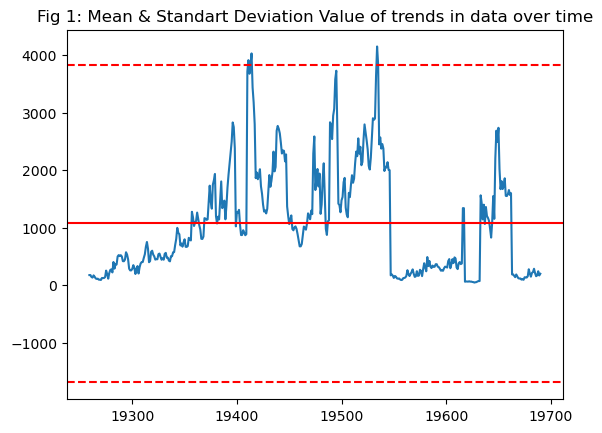

In [27]:
"""
A graphical representation of data that displays data along a number line, and it can be used to visualize 
patterns and trends in data over time.
- It represents the "mean" of the 'Value' column, which is the average value of all the data points.
- The red lines above and below the mean represent 3 standard deviations above and below the mean, respectively
""" 

plt.plot(df1['Value'])
mean_l = df1['Value'].mean()
sd_l = df1['Value'].std()
plt.axhline(y=mean_l,color='red',linestyle='-')
plt.axhline(y=(mean_l + 3*sd_l),color='red',linestyle='--')
plt.axhline(y=(mean_l - 3*sd_l),color='red',linestyle='--')
# Add a title to the plot
plt.title( 'Fig 1: Mean & Standart Deviation Value of trends in data over time')
plt.show()

Text(0.5, 1.0, 'Fig 2: Trend in the Price Change')

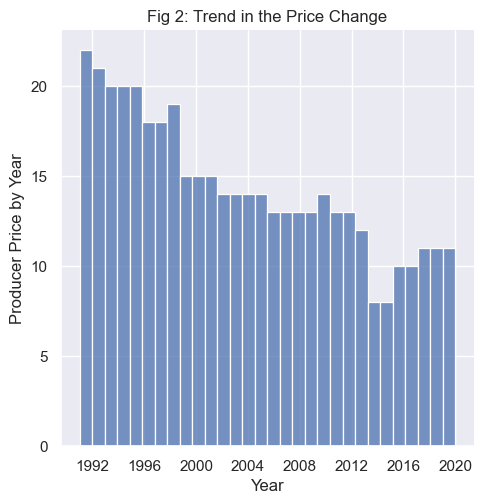

In [28]:
sns.set_theme(style='darkgrid')
sns.displot(data=df1, x='Year', bins=30)
plt.xlabel('Year')
plt.ylabel('Producer Price by Year')
plt.title('Fig 2: Trend in the Price Change')

# This plot visualizes the distribution of the Items respective to the 'Year' column and identifies patterns in 
# trends of the data over time.


In [29]:
# here we compute the mean producer value per year in Europe
data=df1.groupby('Year').agg({'Value':'mean'}).reset_index()
data.head(2)

,Year,Value
0,1991-01-01,1196.518182
1,1992-01-01,1208.642857


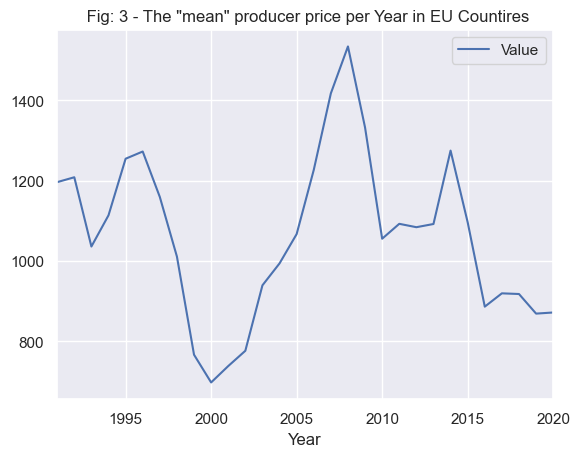

In [30]:
# Create a new figure with figure number 3

# Plot the data
ax = data.plot(x='Year', y=['Value'])

# Set the title of the plot
ax.set_title(' Fig: 3 - The "mean" producer price per Year in EU Countires')

# Display the plot
plt.show()


In [31]:
# here we compute the mean producer value per year 
# data2=ire_df1.groupby('Year').agg({'Value':'mean'}).reset_index()
# data2.head(2)

In [32]:
data2=ire_df1[['Year','Value', 'Item']]
data2.set_index('Year', inplace=True)
pivot=data2.pivot_table(values='Value',index='Year',columns='Item')
data2.head(2)

,Value,Item
Year,,
1991-01-01,173.8,Barley
1992-01-01,173.5,Barley


In [48]:
pivot=data2.pivot_table(values='Item',index='Year',columns='Item')
pivot.head(2)

Item,Barley,Cabbages,Carrots and turnips,Cauliflowers and broccoli,"Hen eggs in shell, fresh",Lettuce and chicory,"Meat of cattle with the bone, fresh or chilled","Meat of cattle with the bone, fresh or chilled (biological)","Meat of chickens, fresh or chilled","Meat of chickens, fresh or chilled (biological)",...,"Meat of sheep, fresh or chilled","Meat of sheep, fresh or chilled (biological)",Mushrooms and truffles,Oats,"Onions and shallots, dry (excluding dehydrated)",Raw milk of cattle,Strawberries,Sugar beet,Tomatoes,Wheat
Year,,,,,,,,,,,,,,,,,,,,,
1991-01-01,173.8,400.8,284.9,490.9,1274.7,1199.1,3718.0,1860.6,1368.1,1142.7,...,2832.7,1416.4,2285.5,169.0,265.6,296.1,1339.1,57.9,1561.2,185.1
1992-01-01,173.5,285.8,255.2,440.7,1180.8,1071.9,3913.2,1958.3,NaN,1211.4,...,2790.3,1391.7,2405.7,187.2,245.0,338.6,1337.3,63.0,1420.7,185.5


In [52]:
pivot.dropna()

Item,Barley,Cabbages,Carrots and turnips,Cauliflowers and broccoli,"Hen eggs in shell, fresh",Lettuce and chicory,"Meat of cattle with the bone, fresh or chilled","Meat of cattle with the bone, fresh or chilled (biological)","Meat of chickens, fresh or chilled","Meat of chickens, fresh or chilled (biological)",...,"Meat of sheep, fresh or chilled","Meat of sheep, fresh or chilled (biological)",Mushrooms and truffles,Oats,"Onions and shallots, dry (excluding dehydrated)",Raw milk of cattle,Strawberries,Sugar beet,Tomatoes,Wheat
Year,,,,,,,,,,,,,,,,,,,,,
1991-01-01,173.8,400.8,284.9,490.9,1274.7,1199.1,3718.0,1860.6,1368.1,1142.7,...,2832.7,1416.4,2285.5,169.0,265.6,296.1,1339.1,57.9,1561.2,185.1


Text(0.5, 1.0, 'Fig 4: Production Price in Ireland')

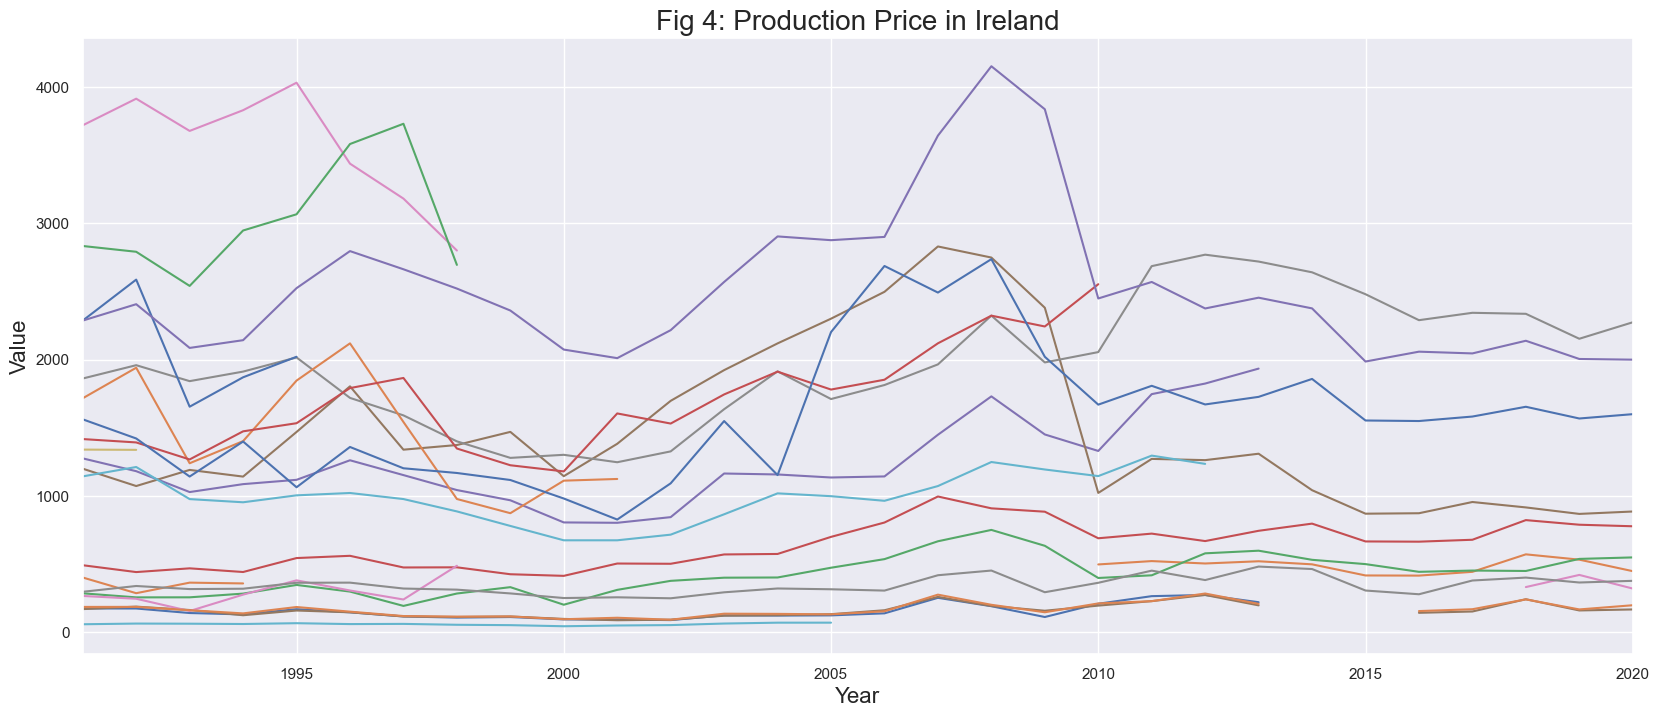

In [54]:
pivot.plot(figsize=(20,8))
plt.legend().remove()
plt.xlabel('Year',fontsize=16)
plt.ylabel('Value',fontsize=16)
plt.title('Fig 4: Production Price in Ireland', fontsize=20)

In [71]:
#import Plotly Components
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [97]:
df_countrydate = df1.groupby([df1['Year'].dt.year, 'Country']). sum().reset_index()
df_countrydate = df_countrydate.drop(columns=['Country', 'Country Code', 'Item Code', 'Value'])


#Creating the visualization 

fig = px.choropleth(df_countrydate, locations="Year", locationmode = "country names", color="Year", hover_name="Year", animation_frame="Year",
                   width=800, height=450)



fig.show()


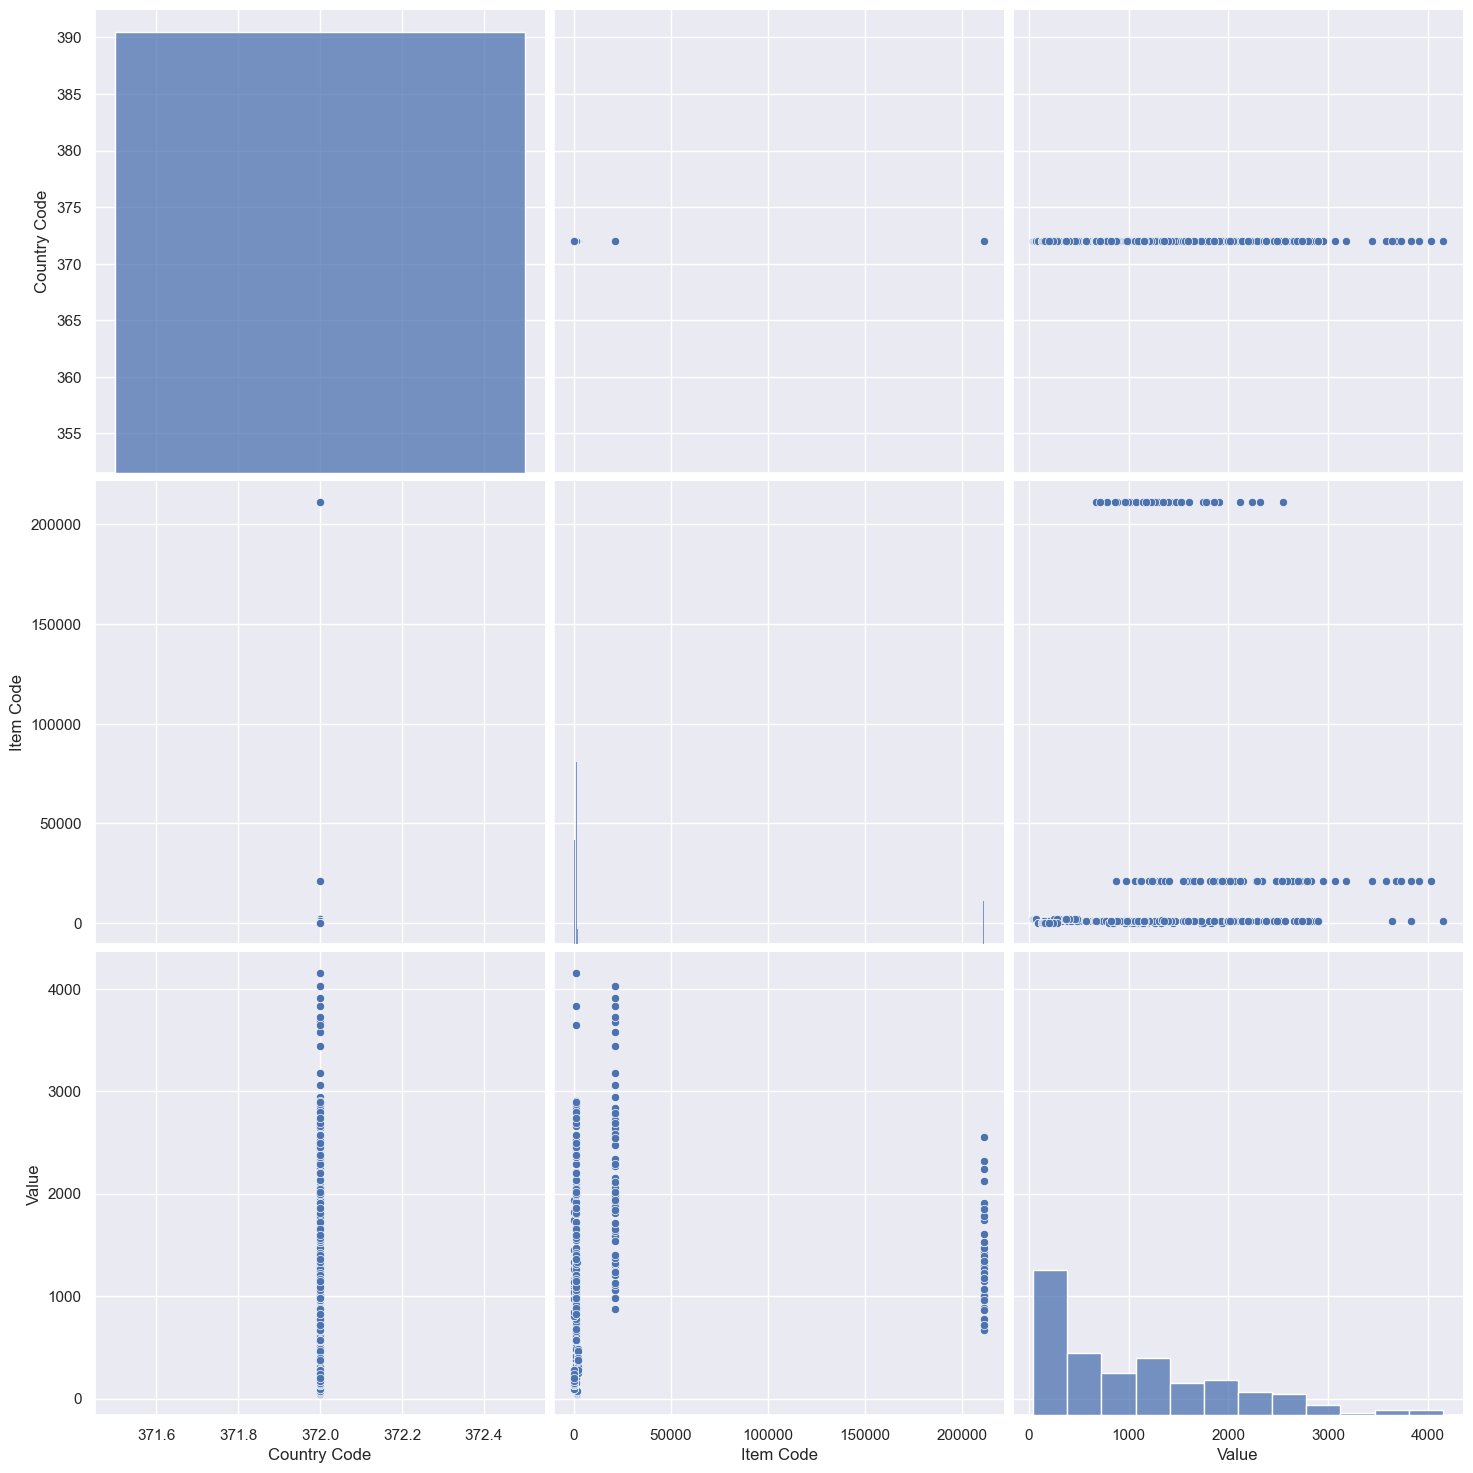

In [105]:
sns.pairplot(df1, aspect=1, height=5)
plt.show()

<Figure size 4000x2000 with 0 Axes>

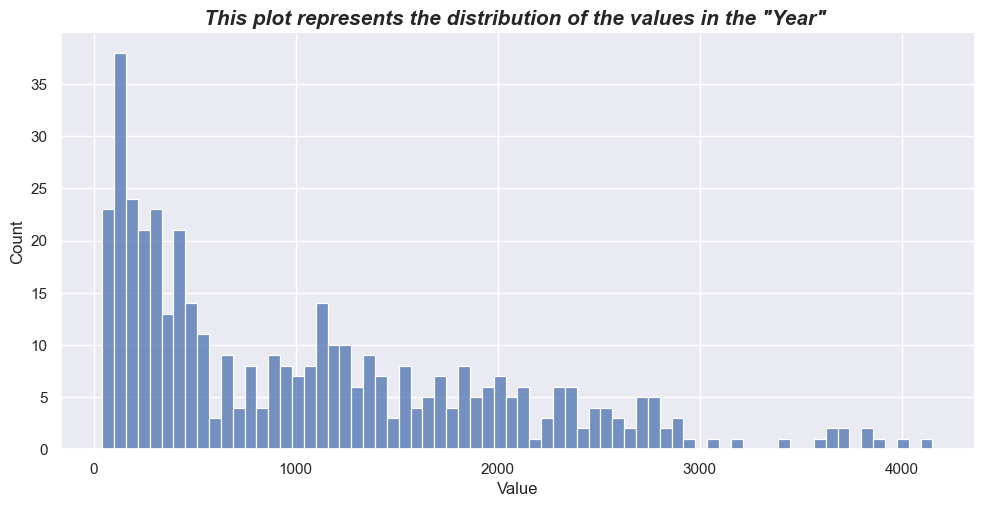

In [104]:
plt.figure(figsize=(20,10),dpi=200)
sns.displot(data=df1, x='Value', bins=70, color="b", aspect=2)
plt.title('This plot represents the distribution of the values in the "Year" ', fontsize=15, fontweight='bold', fontstyle='italic')
plt.show()

# Statistical Analysis


### Calculation of Mean, STD & Variance

In [109]:
Yearfrequencytable = pd.crosstab(index=df1["Year"], columns="Value") 

print("Total number of Values :")
Total = sum(Yearfrequencytable["Value"])
print(Total)

print("Average number of Values each year :")
print(Total/len(Yearfrequencytable))

answer= Yearfrequencytable.std()

print("The standard deviations of the Value is :")
print (float(answer))
print("The Varience of the Value is :")
print (float(answer**2))

Total number of Values :
432
Average number of Values each year :
14.4
The standard deviations of the Value is :
3.7929153558380033
The Varience of the Value is :
14.386206896551727


### Calculation of  the contingency table using chi2 method
####  The contingency table can be calculated using this method by calculating the chi-square statistic, the p-value, the degrees of freedom, and the expected frequencies. These values can then be used to determine whether the two categorical variables are significant. If the p-value is less than the significance level (usually 0.05), you can conclude that there is a significant association between the variables. 

In [110]:
from scipy.stats import chi2_contingency

# Use the crosstab method to create a cross-tabulation table
ct = pd.crosstab(df['Year'], df['Value'], margins=True, normalize=True)

# Calculate the chi-square statistic for testing independence
stat, p, dof, expected = chi2_contingency(ct.iloc[:-1, :-1])

# Print the p-value
print(p)
print(' The (p) value is 1. then we fail to reject the Null Hypothesis and Null Hypothesis stais.')

1.0
 The (p) value is 1. then we fail to reject the Null Hypothesis and Null Hypothesis stais.


### Calculation of Poisson Distribution

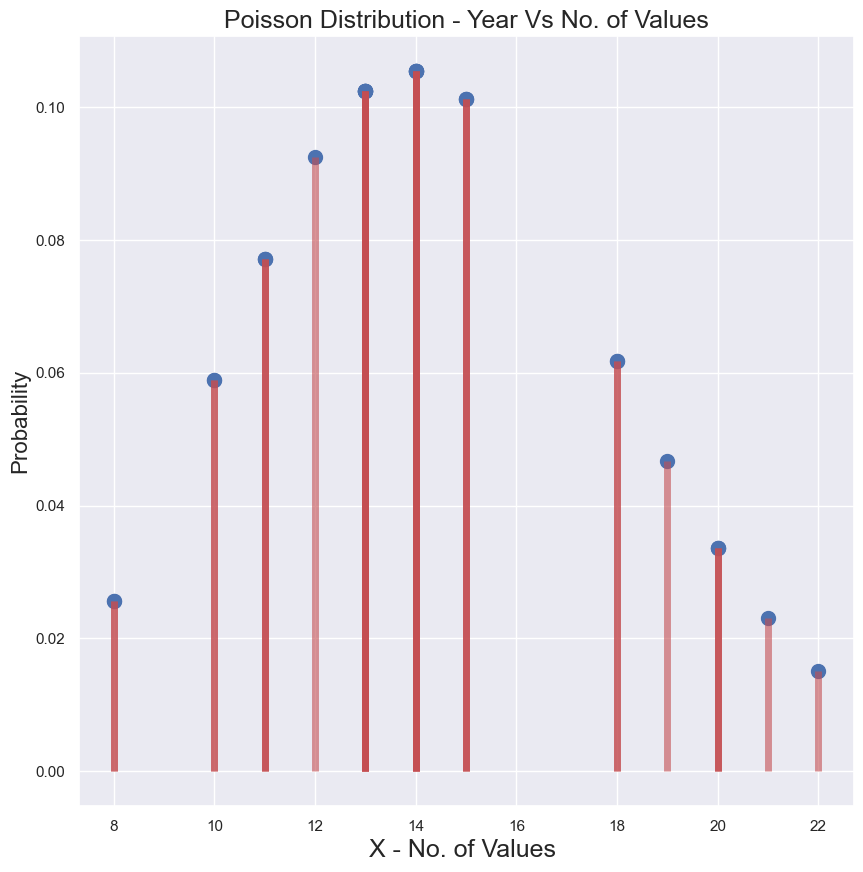

In [111]:
from scipy.stats import poisson

X = Yearfrequencytable['Value']
lmbda = Total/len(Yearfrequencytable)

poisson_pd = poisson.pmf(X, lmbda)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(X, poisson_pd, 'bo', ms=10, label='poisson pmf')
plt.ylabel("Probability", fontsize="16")
plt.xlabel("X - No. of Values ", fontsize="18")
plt.title("Poisson Distribution - Year Vs No. of Values", fontsize="18")
ax.vlines(X, 0, poisson_pd, colors='r', lw=5, alpha=0.6)

### Anova Test

In [118]:
from scipy.stats import f_oneway
stats.f_oneway(df1['Year'],df1['Value'],df1['Item Code'])

F_onewayResult(statistic=6463.733887803196, pvalue=0.0)

In [123]:
import statsmodels.stats.oneway as oneway

In [125]:
df1['Year'] = df1['Year'].apply(lambda x: x.year).astype(int)

In [126]:
oneway.anova_oneway((df1['Year'],df1['Value'],df1['Item Code']), use_var='equal')

<class 'statsmodels.stats.base.HolderTuple'>
statistic = 59.60909623711433
pvalue = 1.72556542882542e-25
df = (2.0, 1293.0)
df_num = 2.0
df_denom = 1293.0
nobs_t = 1296.0
n_groups = 3
means = array([ 2003.42592593,  1071.30347222, 24467.10602083])
nobs = array([432., 432., 432.])
vars_ = array([7.46719945e+01, 8.50253224e+05, 3.81426304e+09])
use_var = 'equal'
welch_correction = True
tuple = (59.60909623711433, 1.72556542882542e-25)

### Forecasting with ARIMA

In [129]:
from statsmodels.tsa.stattools import adfuller

In [139]:
def adfuller_test(df1):
    result=adfuller(df1)
    labels=['ADF Test statistics','p-value','lags_used', 'nobs']
    
    for value,label in zip(result,labels):
        print (label + ' : ' + str(value))
    if result[1] <=0.05:
        print('Reject the Ho, data is stationary')
    else:
        print('Fail to reject the Ho, data is not stationary')

In [140]:
adfuller_test(df_countries['Value'])

ADF Test statistics : -6.792555907795393
p-value : 2.344556602735128e-09
lags_used : 6
nobs : 113
Reject the Ho, data is stationary


#### Here I use ARIMA as a statistical model for analyzing and forecasting time series data.

In [148]:
from pmdarima import auto_arima
arima_fit = auto_arima(df1['Value'],start_P=0,start_Q=0,max_P=10,max_Q=10,seasonal=False,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6202.741, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6213.387, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6214.166, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6213.825, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6211.388, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6202.972, Time=0.62 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6212.889, Time=0.09 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=6204.767, Time=1.03 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=6204.743, Time=1.19 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6212.056, Time=0.32 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=6203.528, Time=1.15 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=6214.308, Time=0.42 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.59 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=6200.752, Time=0.68 sec
 ARIMA(1,1,2)(0,0,0)[0]             : 

In [149]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(df1['Value'],order=(2,1,2))
modelresults=model.fit()
fcast=modelresults.predict(start = len(df1),type=('Levels'))
fcast=fcast.rename('ARIMA 4,0,1 Forecast')

<AxesSubplot:>

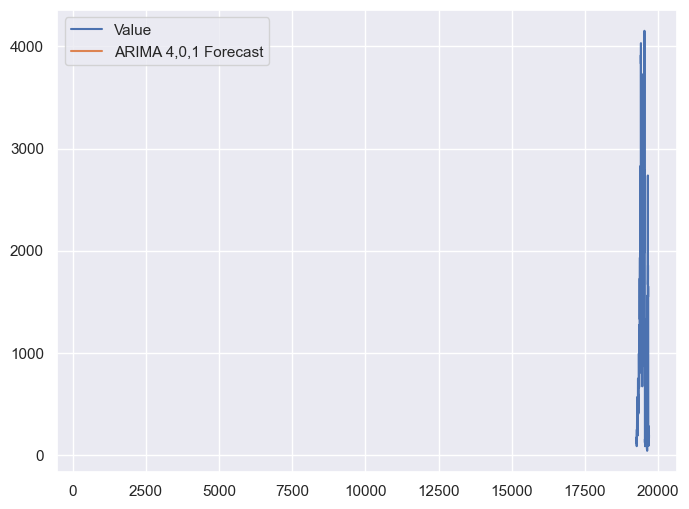

In [150]:
df1['Value'].plot(figsize=(8, 6), legend=True)

# ire_df1['Value'].plotfigsize=(12, 8),legend=True)
fcast.plot(legend=True)


#### Calculation of the IQR value

In [152]:
import numpy as np
"""
Calculation of the IQR value by subtracting the 25th percentile value from the 75th percentile value
We need to perform the IQR calculation in order to identify and remove outliers from a dataset. First we mark the outlier as Nan
then we remove the Nan by using the function dropNa.
"""
q25 = np.percentile(df1['Value'], 25)
q75 = np.percentile(df1['Value'], 75)
IQRValue = q75 - q25
upperlim = q75 + 1.5 * IQRValue
lowerlim = q25 -1.5 * IQRValue
df1.loc[df1['Value']>upperlim] = np.nan
df1.loc[df1['Value']<lowerlim] = np.nan

#### Manual Calculation of IQR value

In [154]:
"""
# Calculate the IQR value by subtracting the 25th percentile value from the 75th percentile value
IQRValue = 1676.925000 - 283.400000
upperlim = 1676.925000 + 1.5 * IQRValue
lowerlim = 283.400000 -1.5 * IQRValue
df1.loc[df1['Value']>upperlim] = np.nan
df1.loc[df1['Value']<lowerlim] = np.nan

"""

"\n# Calculate the IQR value by subtracting the 25th percentile value from the 75th percentile value\nIQRValue = 1676.925000 - 283.400000\nupperlim = 1676.925000 + 1.5 * IQRValue\nlowerlim = 283.400000 -1.5 * IQRValue\ndf1.loc[df1['Value']>upperlim] = np.nan\ndf1.loc[df1['Value']<lowerlim] = np.nan\n\n"

### Feature Encoding

In [187]:
# This peace of code represents the application of the best "Feature Selection" method

In [189]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [190]:
ind_col = [col for col in df1.columns if col !='Value']
dep_col='Value'
x=df1[ind_col] # represents all independant features
y=df1[dep_col] # represents all dependant features that we use in our models

In [191]:
from sklearn.preprocessing import OneHotEncoder

# Encode the categorical features as one-hot encoded values
encoder = OneHotEncoder(handle_unknown='ignore')
x_encoded = encoder.fit_transform(x)
# Define the target variable y_encoded
# Reshape the y Series to a NumPy array
y_array = y.values.reshape(-1, 1)

# Encode the target variable as a one-hot encoded array
encoder = OneHotEncoder(handle_unknown='ignore')
y_encoded = encoder.fit_transform(y_array)

# Select the best features using the encoded feature values
selected_features = SelectKBest(score_func=chi2, k=10)
selected_features.fit(x_encoded, y_encoded)


SelectKBest(score_func=<function chi2 at 0x000001AF4031C550>)

In [192]:
selected_features

SelectKBest(score_func=<function chi2 at 0x000001AF4031C550>)

In [193]:
selected_features.scores_

array([  5.        , 427.        ,   5.        , 427.        ,
         5.        , 427.        ,   5.        , 427.        ,
       380.85714286, 371.43478261, 357.71428571, 409.        ,
       388.2       , 402.        , 402.        , 394.8       ,
       380.4       , 421.        , 396.28571429, 430.        ,
       417.        , 387.6       , 427.        , 402.        ,
       340.6       , 421.        , 424.        , 429.        ,
       412.        , 410.        , 427.        , 371.43478261,
       388.2       , 380.4       , 402.        , 409.        ,
       402.        , 427.        , 402.        , 429.        ,
       410.        , 340.6       , 421.        , 424.        ,
       412.        , 396.28571429, 357.71428571, 421.        ,
       387.6       , 430.        , 417.        , 394.8       ,
       380.85714286, 427.        , 410.        , 412.        ,
       401.2       , 413.        , 401.63157895, 402.        ,
       414.        , 390.26315789, 417.        , 402.6 

In [194]:
datavalue = pd.DataFrame(selected_features.scores_, columns = ['Value'])
dfcols = pd.DataFrame(x.columns)

In [196]:
"""
Here, I check which features should be used in our models. DropNa doesn't let me use it. 
Due to its Nan features, I should drop this strategy and switch to another.

"""
features_rank = pd.concat([dfcols, datavalue],axis=1)
selected_columns = features_rank.nlargest(10,'Value').values
# selected_columns = features_rank.head(10)
selected_columns

array([[nan, 429.99999999999994],
       [nan, 429.99999999999994],
       [nan, 429.00000000000017],
       [nan, 429.00000000000017],
       ['Country Code', 427.0000000000001],
       ['Element', 427.0000000000001],
       ['Item', 427.0000000000001],
       ['Months', 427.0000000000001],
       [nan, 427.0000000000001],
       [nan, 427.0000000000001]], dtype=object)

In [197]:
from sklearn.preprocessing import OneHotEncoder

# Reshape the y Series to a NumPy array
y_array = y.values.reshape(-1, 1)

# Encode the target variable as a one-hot encoded array
encoder = OneHotEncoder(handle_unknown='ignore')
y_encoded = encoder.fit_transform(y_array)

# Select the best features using the encoded feature and target values
ordered_rank_features = SelectKBest(score_func=chi2, k='all')
ordered_feature = ordered_rank_features.fit(x_encoded, y_encoded)

In [198]:
ordered_feature

SelectKBest(k='all', score_func=<function chi2 at 0x000001AF4031C550>)

In [199]:
ordered_feature.scores_ # Here we get the best scores for the features to perform ML learning

array([  5.        , 427.        ,   5.        , 427.        ,
         5.        , 427.        ,   5.        , 427.        ,
       380.85714286, 371.43478261, 357.71428571, 409.        ,
       388.2       , 402.        , 402.        , 394.8       ,
       380.4       , 421.        , 396.28571429, 430.        ,
       417.        , 387.6       , 427.        , 402.        ,
       340.6       , 421.        , 424.        , 429.        ,
       412.        , 410.        , 427.        , 371.43478261,
       388.2       , 380.4       , 402.        , 409.        ,
       402.        , 427.        , 402.        , 429.        ,
       410.        , 340.6       , 421.        , 424.        ,
       412.        , 396.28571429, 357.71428571, 421.        ,
       387.6       , 430.        , 417.        , 394.8       ,
       380.85714286, 427.        , 410.        , 412.        ,
       401.2       , 413.        , 401.63157895, 402.        ,
       414.        , 390.26315789, 417.        , 402.6 

In [202]:
# Convert this array into a dataframe 
datavalue = pd.DataFrame(ordered_feature.scores_, columns = ['Value'])
datavalue.head()

,Value
0,5.0
1,427.0
2,5.0
3,427.0
4,5.0


In [203]:
dfcols = pd.DataFrame(x.columns)

In [204]:
# Here we check the best selected features ranks to use in our models. However, due to the fact that it has a lot of Nan features we drop this strategy.
features_rank = pd.concat([dfcols, datavalue],axis=1)
selected_columns = features_rank.nlargest(10,'Value').values
# selected_columns = features_rank.head(10)
selected_columns

array([[nan, 429.99999999999994],
       [nan, 429.99999999999994],
       [nan, 429.00000000000017],
       [nan, 429.00000000000017],
       ['Country Code', 427.0000000000001],
       ['Element', 427.0000000000001],
       ['Item', 427.0000000000001],
       ['Months', 427.0000000000001],
       [nan, 427.0000000000001],
       [nan, 427.0000000000001]], dtype=object)

In [205]:
"""
The following Features are the best features to use in our ML modeling     
['Country Code', 427.0000000000001],
['Element', 427.0000000000001],
['Item', 427.0000000000001],
['Months', 427.0000000000001]
"""

"\nThe following Features are the best features to use in our ML modeling     \n['Country Code', 427.0000000000001],\n['Element', 427.0000000000001],\n['Item', 427.0000000000001],\n['Months', 427.0000000000001]\n"

In [188]:
# -------------------End of FE

In [155]:
x= df1[['Country Code', 'Year','Item Code']]
y = df1['Value']

### Cross-Validation Model

#### Here we build a Cross-Validated Model to predict and check accuracy of our models

In [158]:
from sklearn.model_selection import train_test_split

In [159]:
ind_col = [col for col in df1.columns if col !='Value']
dep_col='Value'
X=df1[ind_col] # represents all independant features
y=df1[dep_col] # represents all dependant features that we use in our models

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [161]:
print(X_train.shape) 

(289, 9)


#### Our results show that we have 286 entires that we can TRAIN this predictions

In [162]:
print(X_test.shape) 

(143, 9)


#### Our results show that we have 143 entires that we can Test 

In [163]:
# Check the imbalance in Data
y_train.value_counts()

111.1     2
2285.5    2
673.8     2
314.6     1
48.9      1
         ..
192.5     1
1746.1    1
1845.3    1
1469.1    1
1913.3    1
Name: Value, Length: 284, dtype: int64

### ML

We use Python’s lazy predict library, to compare the performance of all machine learning models so that I can choose the best performing model for my problem

In [230]:
from lazypredict.Supervised import LazyClassifier
import numpy as np
import pandas as pd

data = pd.read_csv('Producer Prices.csv')

x = np.array(data[["Year", "Value"]])
y = np.array(data[["Area"]])
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.10, random_state=42)

Here we use the Lazy Predict Library to check the performance of all classification machine learning models
##### !pip install lazypredict

In [232]:
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True, 
                     custom_metric=None)
models, predictions = clf.fit(xtrain, xtest, ytrain, ytest)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [07:52<00:00, 16.29s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BaggingClassifier,0.09,0.08,None,0.09,1.14
NearestCentroid,0.05,0.08,None,0.03,0.11
RandomForestClassifier,0.09,0.08,None,0.09,10.26
ExtraTreesClassifier,0.08,0.08,None,0.08,15.91
DecisionTreeClassifier,0.09,0.07,None,0.09,0.27
ExtraTreeClassifier,0.08,0.07,None,0.08,0.13
LGBMClassifier,0.08,0.07,None,0.07,7.58
AdaBoostClassifier,0.08,0.05,None,0.04,5.52
KNeighborsClassifier,0.07,0.05,None,0.06,0.60
